# Chapter 8: Advanced Data Analysis
In the last few chapters, we have become comfortable with the idea of building our own functions. These can become quite complex, as we have learned with the construction of the OLS regression in chapter 7. We will continue developing our tool set for working with and managing large sets of data by integrating data from different data sets. We will introduce the multi index to facilitate this process. Among other things, the multi index is useful for including identifiers across time and region or principality. We will also use the multi index to perform a panel regression that controls for level effects between different countries.

## Using a Double Index to Work with Panel Data
In any project, it will not be uncommon for data to be attached to more than one indentifying category. Often, data will be labeled by polity and by date. In the next several examples, we will work with multiple data sets of this sort, working to combine different data sets, investigate the features of the double index, and use this data in a panel regression that can control for effects by polity and by time period.

### Plotting with Double Index
We will be working with two datasets in the next example: The [Fraser Economic Freedom Index](https://www.fraserinstitute.org/economic-freedom/dataset?geozone=world&page=dataset&min-year=2&max-year=0&filter=0&year=2017) and GDP from the [Maddison Project](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2018).

Due to the formatting of the Fraser Economic Freedom Index, the first column and the first three rows of data in the sheet titled “EFW Index 2018 Report” are blank. We will account for this when importing the data with pandas. Both should be saved in the same folder as the script below.

First, import the GDP data from Maddison Project:

In [1]:
#multiIndex.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# index_col = [0,2] will select countrycode as the primary index and year as the secondary index
data = pd.read_excel("mpd2018.xlsx", 
                     sheet_name = "Full data", 
                     index_col = [0,2])

data

country  cgdppc  rgdpnapc      pop         i_cig  \
countrycode year                                                         
AFG         1820  Afghanistan     NaN       NaN   3280.0           NaN   
            1870  Afghanistan     NaN       NaN   4207.0           NaN   
            1913  Afghanistan     NaN       NaN   5730.0           NaN   
            1950  Afghanistan  2392.0    2392.0   8150.0  Extrapolated   
            1951  Afghanistan  2422.0    2422.0   8284.0  Extrapolated   
            1952  Afghanistan  2462.0    2462.0   8425.0  Extrapolated   
            1953  Afghanistan  2568.0    2568.0   8573.0  Extrapolated   
            1954  Afghanistan  2576.0    2576.0   8728.0  Extrapolated   
            1955  Afghanistan  2579.0    2579.0   8891.0  Extrapolated   
            1956  Afghanistan  2644.0    2644.0   9062.0  Extrapolated   
            1957  Afghanistan  2593.0    2593.0   9241.0  Extrapolated   
            1958  Afghanistan  2684.0    2684.0   9429.0  Extrapolated   
            1959  Afghanistan  2705.0    2705.0   9625.0  Extrapolated   
            1960  Afghanistan  2744.0    2744.0   9829.0  Extrapolated   
            1961  Afghanistan  2708.0    2708.0  10043.0  Extrapolated   
            1962  Afghanistan  2695.0    2695.0  10267.0  Extrapolated   
            1963  Afghanistan  2683.0    2683.0  10501.0  Extrapolated   
            1964  Afghanistan  2673.0    2673.0  10744.0  Extrapolated   
            1965  Afghanistan  2670.0    2670.0  10998.0  Extrapolated   
            1966  Afghanistan  2633.0    2633.0  11262.0  Extrapolated   
            1967  Afghanistan  2642.0    2642.0  11538.0  Extrapolated   
            1968  Afghanistan  2670.0    2670.0  11825.0  Extrapolated   
            1969  Afghanistan  2646.0    2646.0  12123.0  Extrapolated   
            1970  Afghanistan  2632.0    2632.0  12431.0  Extrapolated   
            1971  Afghanistan  2560.0    2560.0  12749.0  Extrapolated   
            1972  Afghanistan  2086.0    2086.0  13079.0  Extrapolated   
            1973  Afghanistan  2091.0    2091.0  13421.0  Extrapolated   
            1974  Afghanistan  2149.0    2149.0  13772.0  Extrapolated   
            1975  Afghanistan  2225.0    2225.0  14132.0  Extrapolated   
            1976  Afghanistan  2286.0    2286.0  14501.0  Extrapolated   
...                       ...     ...       ...      ...           ...   
ZWE         1987     Zimbabwe  3243.0    2070.0   9216.0  Interpolated   
            1988     Zimbabwe  3340.0    2182.0   9560.0  Interpolated   
            1989     Zimbabwe  3369.0    2252.0   9868.0  Interpolated   
            1990     Zimbabwe  3265.0    2232.0  10156.0  Interpolated   
            1991     Zimbabwe  3280.0    2292.0  10437.0  Interpolated   
            1992     Zimbabwe  2845.0    2030.0  10720.0  Interpolated   
            1993     Zimbabwe  2749.0    2004.0  10976.0  Interpolated   
            1994     Zimbabwe  2913.0    2167.0  11086.0  Interpolated   
            1995     Zimbabwe  2841.0    2156.0  11159.0  Interpolated   
            1996     Zimbabwe  3032.0    2346.0  11317.0  Interpolated   
            1997     Zimbabwe  3013.0    2377.0  11469.0  Interpolated   
            1998     Zimbabwe  3006.0    2417.0  11607.0  Interpolated   
            1999     Zimbabwe  2889.0    2367.0  11733.0  Interpolated   
            2000     Zimbabwe  2696.0    2249.0  11820.0  Interpolated   
            2001     Zimbabwe  2624.0    2228.0  11868.0  Interpolated   
            2002     Zimbabwe  2376.0    2054.0  11866.0  Interpolated   
            2003     Zimbabwe  1958.0    1722.0  11816.0  Interpolated   
            2004     Zimbabwe  1813.0    1622.0  11735.0  Interpolated   
            2005     Zimbabwe  1660.0    1510.0  11639.0  Interpolated   
            2006     Zimbabwe  1587.0    1467.0  11544.0  Interpolated   
            2007     Zimbabwe  1522.0    1431.0  11443.0  Interpolated   
            2008     Zimba

We choose the country code as an index variable instead of choosing the country name because it might be easier to sort with the 3 letter country code than using the full country name. 

When working with a multi index, calling the values from a single index requires a few steps. If you were to call data.index in the console, both the countrycode and the year values would be returned:

In [2]:
data.index

MultiIndex(levels=[['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSK', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GTM', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRI', 'PRK', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLE', 'SLV', 'SRB', 'STP', 

To call only the year values from the multi index, we use the dataframe method, .get_level_values(“year”). This returns the same list, but with only years:

In [3]:
data.index.get_level_values("year")

Int64Index([1820, 1870, 1913, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=19873)

Since we don’t need to hold every repeated year value, only the full range years present in the data set. We will remove an repeated values from the list and then ensure that the list is in order. We can get the country code index on its own by using "groupby". This groups the data by some category. 

In [4]:
countries = data.groupby("countrycode").mean().index
countries

Index(['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI',
       ...
       'URY', 'USA', 'UZB', 'VEN', 'VNM', 'YEM', 'YUG', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='countrycode', length=169)

In [5]:
# We can also get the year index on it's own
years = data.groupby("year").mean().index
years

Int64Index([   1,  730, 1000, 1150, 1280, 1281, 1282, 1283, 1284, 1285,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=741)

In [6]:
# shift the data by one observation
# data.groupby("countrycode").shift()
# for each country, take the difference from the previous year to get the change in absolute number
data.groupby("country").diff()

cgdppc  rgdpnapc     pop
countrycode year                          
AFG         1820     NaN       NaN     NaN
            1870     NaN       NaN   927.0
            1913     NaN       NaN  1523.0
            1950     NaN       NaN  2420.0
            1951    30.0      30.0   134.0
            1952    40.0      40.0   141.0
            1953   106.0     106.0   148.0
            1954     8.0       8.0   155.0
            1955     3.0       3.0   163.0
            1956    65.0      65.0   171.0
            1957   -51.0     -51.0   179.0
            1958    91.0      91.0   188.0
            1959    21.0      21.0   196.0
            1960    39.0      39.0   204.0
            1961   -36.0     -36.0   214.0
            1962   -13.0     -13.0   224.0
            1963   -12.0     -12.0   234.0
            1964   -10.0     -10.0   243.0
            1965    -3.0      -3.0   254.0
            1966   -37.0     -37.0   264.0
            1967     9.0       9.0   276.0
            1968    28.0      28.0   287.0
            1969   -24.0     -24.0   298.0
            1970   -14.0     -14.0   308.0
            1971   -72.0     -72.0   318.0
            1972  -474.0    -474.0   330.0
            1973     5.0       5.0   342.0
            1974    58.0      58.0   351.0
            1975    76.0      76.0   360.0
            1976    61.0      61.0   369.0
...                  ...       ...     ...
ZWE         1987  -249.0    -106.0   339.0
            1988    97.0     112.0   344.0
            1989    29.0      70.0   308.0
            1990  -104.0     -20.0   288.0
            1991    15.0      60.0   281.0
            1992  -435.0    -262.0   283.0
            1993   -96.0     -26.0   256.0
            1994   164.0     163.0   110.0
            1995   -72.0     -11.0    73.0
            1996   191.0     190.0   158.0
            1997   -19.0      31.0   152.0
            1998    -7.0      40.0   138.0
            1999  -117.0     -50.0   126.0
            2000  -193.0    -118.0    87.0
            2001   -72.0     -21.0    48.0
            2002  -248.0    -174.0    -2.0
            2003  -418.0    -332.0   -50.0
            2004  -145.0    -100.0   -81.0
            2005  -153.0    -112.0   -96.0
            2006   -73.0     -43.0   -95.0
            2007   -65.0     -36.0  -101.0
            2008  -262.0    -228.0   -93.0
            2009    69.0      86.0    43.0
            2010    96.0     115.0   259.0
            2011    90.0     111.0   432.0
            2012   108.0      89.0   536.0
            2013   178.0       0.0   563.0
            2014    -4.0     -10.0   589.0
            2015   -38.0     -34.0   458.0
            2016   -30.0     -26.0   317.0

[19873 rows x 3 columns]

The data set has relatively few observations for data before the modern era. Before 1800, even for the years that have entries, data for most countries is not present.

Next, we create a dictionary with tuples containing codes for each pair of countries whose real GDP per capita we will compare. The first pair is Canada and Finland, the second pair is France and Germany, and the third pair is Great Britain and the Netherlands. The first country in each pair will be represented by the linestyle “-” and the second pair by the linestyle “--”.

In [7]:
#multiIndex.py
# . . . 
# pairs of countries to compare in plots
pairs = [("CAN", "FIN"), ("FRA", "DEU"), ("GBR", "NLD")]
linestyles = ["-", ":"]


Now that the dictionary has been prepared, cycle through each pair of countries in the dictionary. Using a for loop, we select one of these at a time with an accompanying linestyle. The code of the country calls the Real GDP data using the command data.ix[(country),:]["cgdppc"]. This selects data by index according to country and includes all years, as is indicated by the colon in the second part of the index entry. Last, the column “cgdppc” is selected. Conveniently, we can also use the code stored in country as the label.

Script in lines 27-30 continue to adjust the plot. The command plt.xlim(xmin, xmax) selects the range of the x-axis. Only data from 1825 to the most recent observation, identified by max(years), is included in the plot. The plt.rcParams.update() commands adjust fontsizes by accessing default parameter in matplotlib. Finally, the create a title that uses latex text by including “$text$”. This italicizes the title text and allows for the use latex commands such as subscripting, greek letters, etc....

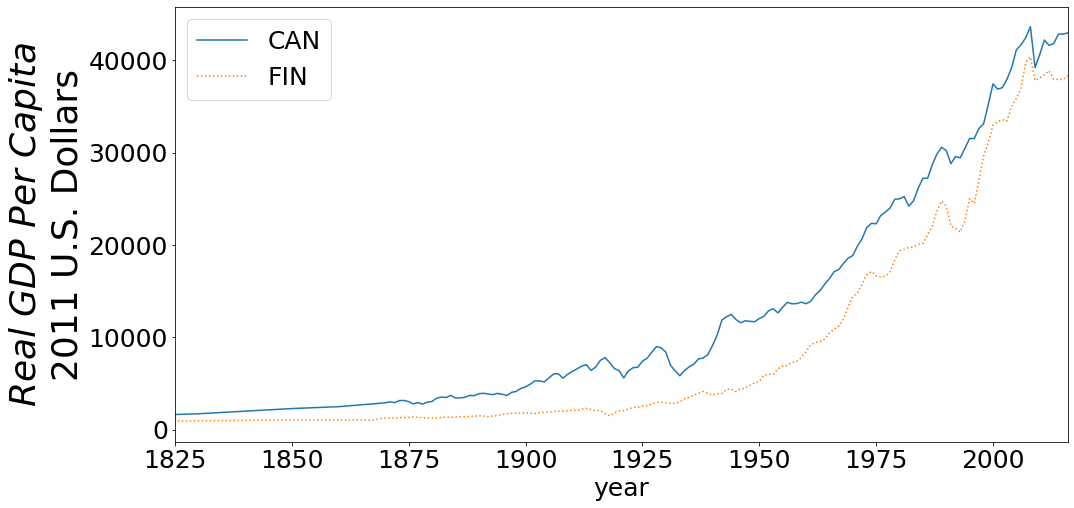

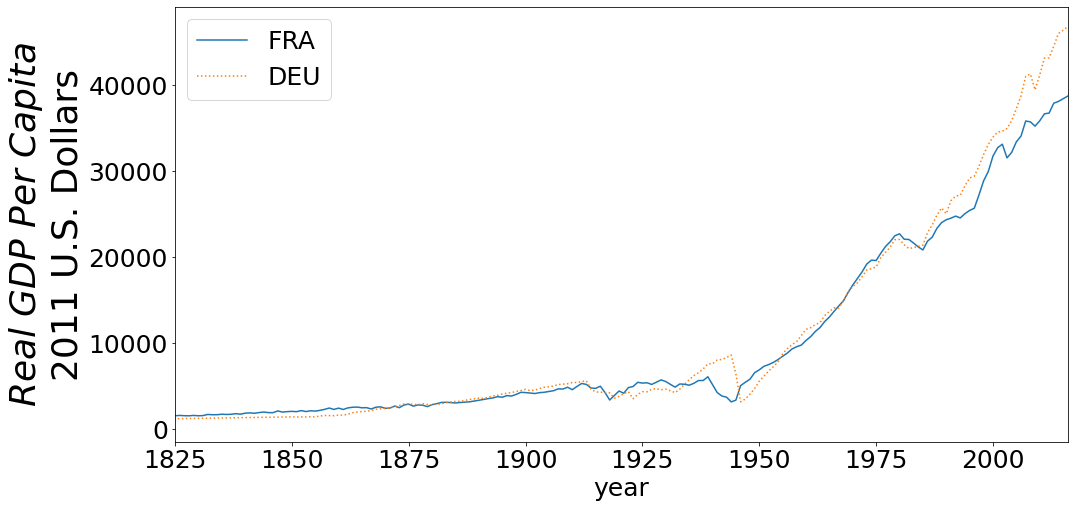

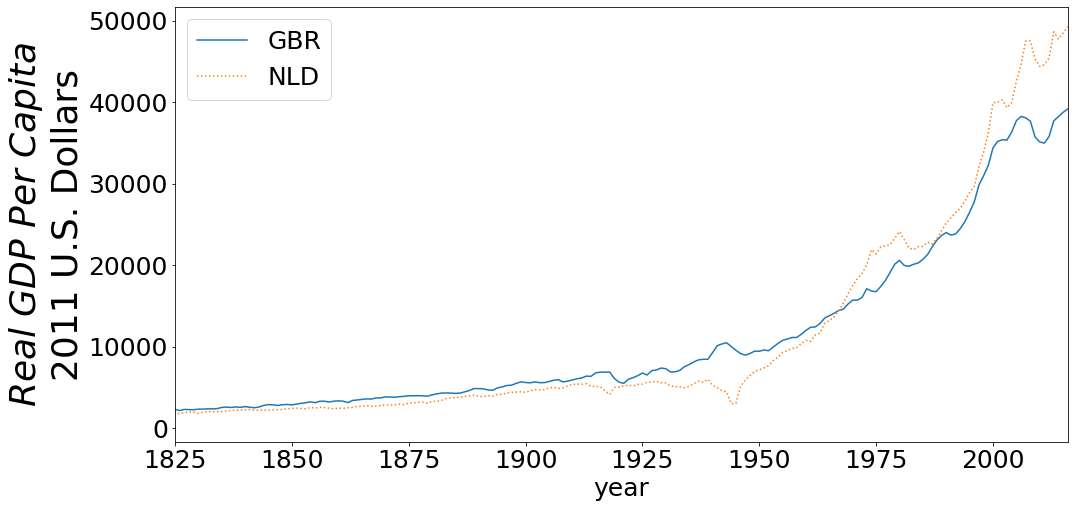

In [8]:
#multiIndex.py
# . . .
  
plt.rcParams.update({"font.size": 25})     
for pair in pairs:  
    fig, ax = plt.subplots(figsize=(16,8))  
    for i in range(len(pair)):  
        country_code = pair[i]
        linestyle = linestyles[i]  
        
        # gather country name associated with country_code
        # 1956 is the date year so full name of the country from year 1956 on the dataset. 
        country_name = data.loc[country_code, 1956]["country"]
        
        # plot country and all dates (:)
        data.loc[country_code, :]["cgdppc"].dropna().plot.line(ax = ax, label = country_code, linestyle = linestyle) 
        # you can replace label = country_code with label = country_name and instead of getting abr, 
        # you'll get the full name of the country
        
    # plot from 1825 to whatever the max or most recent year is on the dataset
    plt.xlim([1825, max(years)])  
    plt.rcParams.update({"legend.fontsize": 25, "legend.handlelength": 2})   
    plt.ylabel(
        "$Real$ $GDP$ $Per$ $Capita$\n2011 U.S. Dollars",
        fontsize=36)  
    plt.legend()  
    plt.show()  
    plt.close()

### Merge Data Sets with Double Index

Next, we will import both sets of data as unique objects with the intention of combining them. First, we must successful import the Fraser Index. Unlike with other files we have imported, the column names are in the third row and the years are in the second column. Finally, we will call the .dropna() method twice to drop any row (axis = 0) and then any column (axis=1) with missing observations:

In [9]:
#dataForPanel.py  
import pandas as pd  
  
# import fraser data
# make sure dates are imported in the same format; to do this, we turned off parse_dates 
fraser_data = pd.read_excel("efw-2019-master-index-data-for-researchers.xlsx",  
                           sheet_name = "EFW Panel Data 2019 Report",  
                           header = [2], index_col = [2, 1], parse_dates=False)  
# drop any empty column and any empty row  
fraser_data = fraser_data.dropna(
    axis=0, thresh=1).dropna(axis=1, thresh=1)  

# import maddison data
maddison_data = pd.read_excel("mpd2018.xlsx", sheet_name = "Full data",   
                              index_col = [0,2])#, parse_dates = True)
maddison_data

country  cgdppc  rgdpnapc      pop         i_cig  \
countrycode year                                                         
AFG         1820  Afghanistan     NaN       NaN   3280.0           NaN   
            1870  Afghanistan     NaN       NaN   4207.0           NaN   
            1913  Afghanistan     NaN       NaN   5730.0           NaN   
            1950  Afghanistan  2392.0    2392.0   8150.0  Extrapolated   
            1951  Afghanistan  2422.0    2422.0   8284.0  Extrapolated   
            1952  Afghanistan  2462.0    2462.0   8425.0  Extrapolated   
            1953  Afghanistan  2568.0    2568.0   8573.0  Extrapolated   
            1954  Afghanistan  2576.0    2576.0   8728.0  Extrapolated   
            1955  Afghanistan  2579.0    2579.0   8891.0  Extrapolated   
            1956  Afghanistan  2644.0    2644.0   9062.0  Extrapolated   
            1957  Afghanistan  2593.0    2593.0   9241.0  Extrapolated   
            1958  Afghanistan  2684.0    2684.0   9429.0  Extrapolated   
            1959  Afghanistan  2705.0    2705.0   9625.0  Extrapolated   
            1960  Afghanistan  2744.0    2744.0   9829.0  Extrapolated   
            1961  Afghanistan  2708.0    2708.0  10043.0  Extrapolated   
            1962  Afghanistan  2695.0    2695.0  10267.0  Extrapolated   
            1963  Afghanistan  2683.0    2683.0  10501.0  Extrapolated   
            1964  Afghanistan  2673.0    2673.0  10744.0  Extrapolated   
            1965  Afghanistan  2670.0    2670.0  10998.0  Extrapolated   
            1966  Afghanistan  2633.0    2633.0  11262.0  Extrapolated   
            1967  Afghanistan  2642.0    2642.0  11538.0  Extrapolated   
            1968  Afghanistan  2670.0    2670.0  11825.0  Extrapolated   
            1969  Afghanistan  2646.0    2646.0  12123.0  Extrapolated   
            1970  Afghanistan  2632.0    2632.0  12431.0  Extrapolated   
            1971  Afghanistan  2560.0    2560.0  12749.0  Extrapolated   
            1972  Afghanistan  2086.0    2086.0  13079.0  Extrapolated   
            1973  Afghanistan  2091.0    2091.0  13421.0  Extrapolated   
            1974  Afghanistan  2149.0    2149.0  13772.0  Extrapolated   
            1975  Afghanistan  2225.0    2225.0  14132.0  Extrapolated   
            1976  Afghanistan  2286.0    2286.0  14501.0  Extrapolated   
...                       ...     ...       ...      ...           ...   
ZWE         1987     Zimbabwe  3243.0    2070.0   9216.0  Interpolated   
            1988     Zimbabwe  3340.0    2182.0   9560.0  Interpolated   
            1989     Zimbabwe  3369.0    2252.0   9868.0  Interpolated   
            1990     Zimbabwe  3265.0    2232.0  10156.0  Interpolated   
            1991     Zimbabwe  3280.0    2292.0  10437.0  Interpolated   
            1992     Zimbabwe  2845.0    2030.0  10720.0  Interpolated   
            1993     Zimbabwe  2749.0    2004.0  10976.0  Interpolated   
            1994     Zimbabwe  2913.0    2167.0  11086.0  Interpolated   
            1995     Zimbabwe  2841.0    2156.0  11159.0  Interpolated   
            1996     Zimbabwe  3032.0    2346.0  11317.0  Interpolated   
            1997     Zimbabwe  3013.0    2377.0  11469.0  Interpolated   
            1998     Zimbabwe  3006.0    2417.0  11607.0  Interpolated   
            1999     Zimbabwe  2889.0    2367.0  11733.0  Interpolated   
            2000     Zimbabwe  2696.0    2249.0  11820.0  Interpolated   
            2001     Zimbabwe  2624.0    2228.0  11868.0  Interpolated   
            2002     Zimbabwe  2376.0    2054.0  11866.0  Interpolated   
            2003     Zimbabwe  1958.0    1722.0  11816.0  Interpolated   
            2004     Zimbabwe  1813.0    1622.0  11735.0  Interpolated   
            2005     Zimbabwe  1660.0    1510.0  11639.0  Interpolated   
            2006     Zimbabwe  1587.0    1467.0  11544.0  Interpolated   
            2007     Zimbabwe  1522.0    1431.0  11443.0  Interpolated   
            2008     Zimba

The object fraserData is imported from the sheet #“EFW Index 2018 Report”#. The 1st and 0th columns are used as index columns in that order, respectively. The object maddisonData is imported from the sheet #“Full data”#. The 0th and 2nd columns columns are used as index columns. The double index of both dataframes refers to the #ISO_Code# (#countrycode#) and the year. Since the objects referred to by the indices match, we will be able to use the double index associated with a particular entry to refer to another double index.

Since both dataframes employ the same double index format, we can copy any column from one dataframe to the other. We will copy for the Maddison GDP data to the Fraser Economic Freedom Index data.

In [10]:
#dataForPanel.py
# . . . 
# copy Maddison GDP data to the Fraser Economic Freedom Index Data
fraser_data["RGDP Per Capita"] = maddison_data["cgdppc"]
fraser_data

Countries       EFW  1  Size of Government  \
ISO_Code Year                                              
ALB      2017   Albania  7.673511               7.528167   
         2016   Albania  7.637742               7.875862   
         2015   Albania  7.639666               7.904257   
         2014   Albania  7.586769               7.882037   
         2013   Albania  7.389525               7.807904   
         2012   Albania  7.332332               8.096375   
         2011   Albania  7.381064               7.820966   
         2010   Albania  7.380725               7.839664   
         2009   Albania  7.313856               7.785948   
         2008   Albania  7.276252               8.189874   
         2007   Albania  7.258078               8.633510   
         2006   Albania  7.148669               8.039787   
         2005   Albania  6.985649               8.031015   
         2004   Albania  6.858749               7.397515   
         2003   Albania  7.031750               7.832298   
         2002   Albania  6.516060               7.700479   
         2001   Albania  6.322281               7.272991   
         2000   Albania  6.296170               7.260723   
         1995   Albania  5.041307               6.222428   
         1990   Albania  4.347428               3.338928   
         1985   Albania       NaN                    NaN   
         1980   Albania       NaN                    NaN   
         1975   Albania       NaN                    NaN   
         1970   Albania       NaN                    NaN   
DZA      2017   Algeria  4.763472               3.577033   
         2016   Algeria  5.030748               3.716934   
         2015   Algeria  4.794132               3.200157   
         2014   Algeria  5.136326               3.983687   
         2013   Algeria  5.167820               4.035976   
         2012   Algeria  5.003921               3.453623   
...                 ...       ...                    ...   
ZMB      1995    Zambia  4.418360               5.895636   
         1990    Zambia  2.870869               3.638100   
         1985    Zambia  3.286548               2.885189   
         1980    Zambia  4.269533               2.345607   
         1975    Zambia  3.709106               2.288363   
         1970    Zambia       NaN                    NaN   
ZWE      2017  Zimbabwe  5.699539               5.491676   
         2016  Zimbabwe  6.033204               5.926764   
         2015  Zimbabwe  6.145330               6.402772   
         2014  Zimbabwe  5.582478               6.433165   
         2013  Zimbabwe  5.246723               6.325105   
         2012  Zimbabwe  4.971192               6.670469   
         2011  Zimbabwe  4.843441               6.424630   
         2010  Zimbabwe  4.374917               6.514112   
         2009  Zimbabwe  4.314332               7.369615   
         2008  Zimbabwe  4.491870               7.070748   
         2007  Zimbabwe  3.204629               5.970748   
         2006  Zimbabwe  3.012548               4.770748   
         2005  Zimbabwe  2.889240               4.291101   
         2004  Zimbabwe  3.181057               5.184469   
         2003  Zimbabwe  3.675260               5.709175   
         2002  Zimbabwe  3.625483               5.514469   
         2001  Zimbabwe  3.633489               5.547411   
         2000  Zimbabwe  4.299839               5.365058   
         1995  Zimbabwe  5.518614               6.418859   
         1990  Zimbabwe  4.516140               5.108843   
         1985  Zimbabwe  4.226841               5.026250   
         1980  Zimbabwe  4.054740               6.322625   
         1975  Zimbabwe       NaN                    NaN   
         1970  Zimbabwe       NaN                    NaN   

               2  Legal System & Property Rights  3  Sound Money  \
ISO_Code Year                                                      
ALB      2017                           5.064907        9.648271   
         2016                

Now that the dataset has been transferred, we can save the result as a csv so that we can call it again in later examples. RGDP Per Capita is shown in the last column of the new csv file:

In [11]:
fraser_data.to_csv("fraserDataWithRGDPPC.csv")

### Creating Indicator Variables

Suppose that we wanted to test the idea that geography influences economic growth. We would need to clarify a hypothesis concerning this. We might believe, for example, that countries in North America tend to have a distinct real gross domestic product than in other continents i.e., real GDP tends to be higher or lower due to residing in North America. To represent this, we would create an indicator variable named “North America”. Countries residing in North America would be indicated with a 1 (i.e., True), and those outside of North America would receive a zero.

To accomplish this task is straightforward if you know the appropriate commands to use. As usual, we import the data. Before creating an indicator variable, you will need to choose the name that will reference the indicator variable, indicator_name, and make a list of the index values, target_index_list that will be recorded as possessing the attribute referred to by the indicator variable. Finally, you will need to choose the name of the index column that includes the elements in the target_index_list. If you are not sure what this name is, you can check the names of the index columns using df.index.names.

In [12]:

#indicatorVariable.py
import pandas as pd  
  
def create_indicator_variable(data, indicator_name, index_name, target_index_list):  
    # Prepare column with name of indicator (aka dummy) variable  
    data[indicator_name] = 0  
    
    # for each index whose name matches an entry in target_index_list  
    # a value of 1 will be recorded  
    for index in target_index_list: 
        # .index.get_level_values is useful to get an individual level of values from a MultiIndex
        data.loc[data.index.get_level_values(index_name) == index, [indicator_name]] = 1  
        
# Import data with "ISO_Code" and "Year" as index columns  
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code", "Year"],
                   #index_col = [0, 1],   
                   parse_dates = True) 
  
# select "ISO_Code" from names of double index 
# df.index.names return Index or MultiIndex name. Use df.index.name for non multiplex data
# note that since we identifed "ISO_Code" and "Year" as index columns, data.index.names will return 
# "ISO_Code" and "Year"
index_name = data.index.names[0]  
indicator_name = "North America"  

# Cuba, Grenada, Saint Kitts, Saint Lucia, Saint Vincent are missing from Fraser Data 
# Select ISO_Codes taht will be marked 1 since they are in North America
countries_in_north_america = [
    "BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]  

In [13]:
# just to illustrate, note that the pandas code index.names will return the predefined index names
data.index.names

FrozenList(['ISO_Code', 'Year'])

In [14]:
# now create indicator variables. These will be automatically added to the data
create_indicator_variable(data = data, 
    indicator_name = indicator_name,  
    index_name = index_name, 
    target_index_list = countries_in_north_america)

In [15]:
# notice now that the dummy variables have been created and added to data
data

Countries       EFW  1  Size of Government  \
ISO_Code Year                                                    
ALB      2017-01-01   Albania  7.673511               7.528167   
         2016-01-01   Albania  7.637742               7.875862   
         2015-01-01   Albania  7.639666               7.904257   
         2014-01-01   Albania  7.586769               7.882037   
         2013-01-01   Albania  7.389525               7.807904   
         2012-01-01   Albania  7.332332               8.096375   
         2011-01-01   Albania  7.381064               7.820966   
         2010-01-01   Albania  7.380725               7.839664   
         2009-01-01   Albania  7.313856               7.785948   
         2008-01-01   Albania  7.276252               8.189874   
         2007-01-01   Albania  7.258078               8.633510   
         2006-01-01   Albania  7.148669               8.039787   
         2005-01-01   Albania  6.985649               8.031015   
         2004-01-01   Albania  6.858749               7.397515   
         2003-01-01   Albania  7.031750               7.832298   
         2002-01-01   Albania  6.516060               7.700479   
         2001-01-01   Albania  6.322281               7.272991   
         2000-01-01   Albania  6.296170               7.260723   
         1995-01-01   Albania  5.041307               6.222428   
         1990-01-01   Albania  4.347428               3.338928   
         1985-01-01   Albania       NaN                    NaN   
         1980-01-01   Albania       NaN                    NaN   
         1975-01-01   Albania       NaN                    NaN   
         1970-01-01   Albania       NaN                    NaN   
DZA      2017-01-01   Algeria  4.763472               3.577033   
         2016-01-01   Algeria  5.030748               3.716934   
         2015-01-01   Algeria  4.794132               3.200157   
         2014-01-01   Algeria  5.136326               3.983687   
         2013-01-01   Algeria  5.167820               4.035976   
         2012-01-01   Algeria  5.003921               3.453623   
...                       ...       ...                    ...   
ZMB      1995-01-01    Zambia  4.418360               5.895636   
         1990-01-01    Zambia  2.870869               3.638100   
         1985-01-01    Zambia  3.286548               2.885189   
         1980-01-01    Zambia  4.269533               2.345607   
         1975-01-01    Zambia  3.709106               2.288363   
         1970-01-01    Zambia       NaN                    NaN   
ZWE      2017-01-01  Zimbabwe  5.699539               5.491676   
         2016-01-01  Zimbabwe  6.033204               5.926764   
         2015-01-01  Zimbabwe  6.145330               6.402772   
         2014-01-01  Zimbabwe  5.582478               6.433165   
         2013-01-01  Zimbabwe  5.246723               6.325105   
         2012-01-01  Zimbabwe  4.971192               6.670469   
         2011-01-01  Zimbabwe  4.843441               6.424630   
         2010-01-01  Zimbabwe  4.374917               6.514112   
         2009-01-01  Zimbabwe  4.314332               7.369615   
         2008-01-01  Zimbabwe  4.491870               7.070748   
         2007-01-01  Zimbabwe  3.204629               5.970748   
         2006-01-01  Zimbabwe  3.012548               4.770748   
         2005-01-01  Zimbabwe  2.889240               4.291101   
         2004-01-01  Zimbabwe  3.181057               5.184469   
         2003-01-01  Zimbabwe  3.675260               5.709175   
         2002-01-01  Zimbabwe  3.625483               5.514469   
         2001-01-01  Zimbabwe  3.633489               5.547411   
         2000-01-01  Zimbabwe  4.299839               5.365058   
         1995-01-01  Zimbabwe  5.518614               6.418859   
         1990-01-01  Zimbabwe  4.516140               5.108843   
         1985-01-01  Zimbabwe  4.226841               5.026250   
         1980-01-01  Zimbabwe  4.054740               6.3226

In [16]:
# we can view only the data for Countries that have a dummy variable of 1
data.loc[(data["North America"] >0), "Countries"]

ISO_Code  Year      
BHS       2017-01-01              Bahamas
          2016-01-01              Bahamas
          2015-01-01              Bahamas
          2014-01-01              Bahamas
          2013-01-01              Bahamas
          2012-01-01              Bahamas
          2011-01-01              Bahamas
          2010-01-01              Bahamas
          2009-01-01              Bahamas
          2008-01-01              Bahamas
          2007-01-01              Bahamas
          2006-01-01              Bahamas
          2005-01-01              Bahamas
          2004-01-01              Bahamas
          2003-01-01              Bahamas
          2002-01-01              Bahamas
          2001-01-01              Bahamas
          2000-01-01              Bahamas
          1995-01-01              Bahamas
          1990-01-01              Bahamas
          1985-01-01              Bahamas
          1980-01-01              Bahamas
          1975-01-01              Bahamas
          197

Basically, if a country is located in North America, the dummy variable will be marked as 1. If it's not in North America, the dummy variable we created will be marked 0.

In [17]:
# Since canada and Mexico are both located in North America, we see that it's dummy variable is marked 1
data.loc[["CAN", "MEX"]]

Countries       EFW  1  Size of Government  \
ISO_Code Year                                                    
CAN      2017-01-01    Canada  8.084182               6.484464   
         2016-01-01    Canada  8.087501               6.512695   
         2015-01-01    Canada  8.031869               6.326972   
         2014-01-01    Canada  8.272660               7.144156   
         2013-01-01    Canada  8.107352               6.647373   
         2012-01-01    Canada  8.076373               6.578376   
         2011-01-01    Canada  8.005315               6.475121   
         2010-01-01    Canada  8.082706               6.246591   
         2009-01-01    Canada  8.093283               6.250473   
         2008-01-01    Canada  8.131602               6.345277   
         2007-01-01    Canada  8.169635               6.416926   
         2006-01-01    Canada  8.185558               6.591476   
         2005-01-01    Canada  8.168401               6.620197   
         2004-01-01    Canada  8.165364               6.407781   
         2003-01-01    Canada  8.164371               6.426919   
         2002-01-01    Canada  8.089820               6.430516   
         2001-01-01    Canada  8.068837               6.292870   
         2000-01-01    Canada  8.201035               6.289399   
         1995-01-01    Canada  7.934249               6.108692   
         1990-01-01    Canada  7.962513               6.115060   
         1985-01-01    Canada  7.604050               5.520981   
         1980-01-01    Canada  7.506475               5.649754   
         1975-01-01    Canada  6.954912               5.503318   
         1970-01-01    Canada  7.726607               5.145254   
MEX      2017-01-01    Mexico  6.924638               7.899794   
         2016-01-01    Mexico  6.765401               7.596662   
         2015-01-01    Mexico  6.870605               7.565521   
         2014-01-01    Mexico  6.830050               7.570566   
         2013-01-01    Mexico  6.741077               6.790522   
         2012-01-01    Mexico  6.648044               6.694787   
         2011-01-01    Mexico  6.641699               6.719835   
         2010-01-01    Mexico  6.661801               6.846833   
         2009-01-01    Mexico  6.537502               6.491682   
         2008-01-01    Mexico  6.650639               6.811386   
         2007-01-01    Mexico  6.754750               7.283262   
         2006-01-01    Mexico  6.850885               7.009304   
         2005-01-01    Mexico  6.813623               7.027833   
         2004-01-01    Mexico  6.745819               7.206985   
         2003-01-01    Mexico  6.664144               7.177719   
         2002-01-01    Mexico  6.664172               7.232296   
         2001-01-01    Mexico  6.480747               7.243421   
         2000-01-01    Mexico  6.512623               7.108165   
         1995-01-01    Mexico  6.419693               6.948741   
         1990-01-01    Mexico  6.115854               7.404417   
         1985-01-01    Mexico  4.605876               5.751582   
         1980-01-01    Mexico  5.117640               5.291239   
         1975-01-01    Mexico  5.748692               5.654648   
         1970-01-01    Mexico  6.430644               6.688071   

                     2  Legal System & Property Rights  3  Sound Money  \
ISO_Code Year                                                            
CAN      2017-01-01                           7.845746        9.551266   
         2016-01-01                           7.875940        9.579712   
         2015-01-01                           7.850680        9.582511   
         2014-01-01                           8.045029        9.604124   
         2013-01-01                           7.992168        9.472107   
         2012-01-01                           7.988195        9.381539   
         2011-01-01                           8.123578        9.122951   
         2010-01-01                           8.15596


It is useful to represent discrete variabls, like the indicator variable for "North America", by color in a scatter plot. If there is a difference means between two groups, it is often apparrent when data is visualized by color. In the case of the "North America" indicator variable, the difference in means between the groups does not appear to be causal (statistically significant), as we will show later in the chapter.

We use "North America" as the variable indicating color in the scatter plot.

In [18]:
# plot_data = data[data.index.get_level_values("Year") == 2016]
# plot_data = plot_data[["EFW", "RGDP Per Capita", "North America"]]

# for key in plot_data:
#     plot_data[key] = pd.to_numeric(plot_data[key], errors = "coerce") 
# plot_data["RGDP Per Capita"].plot()

C:\Users\0\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\0\anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\0\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\0\anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNu

Text(0.5, 1.0, '2000')

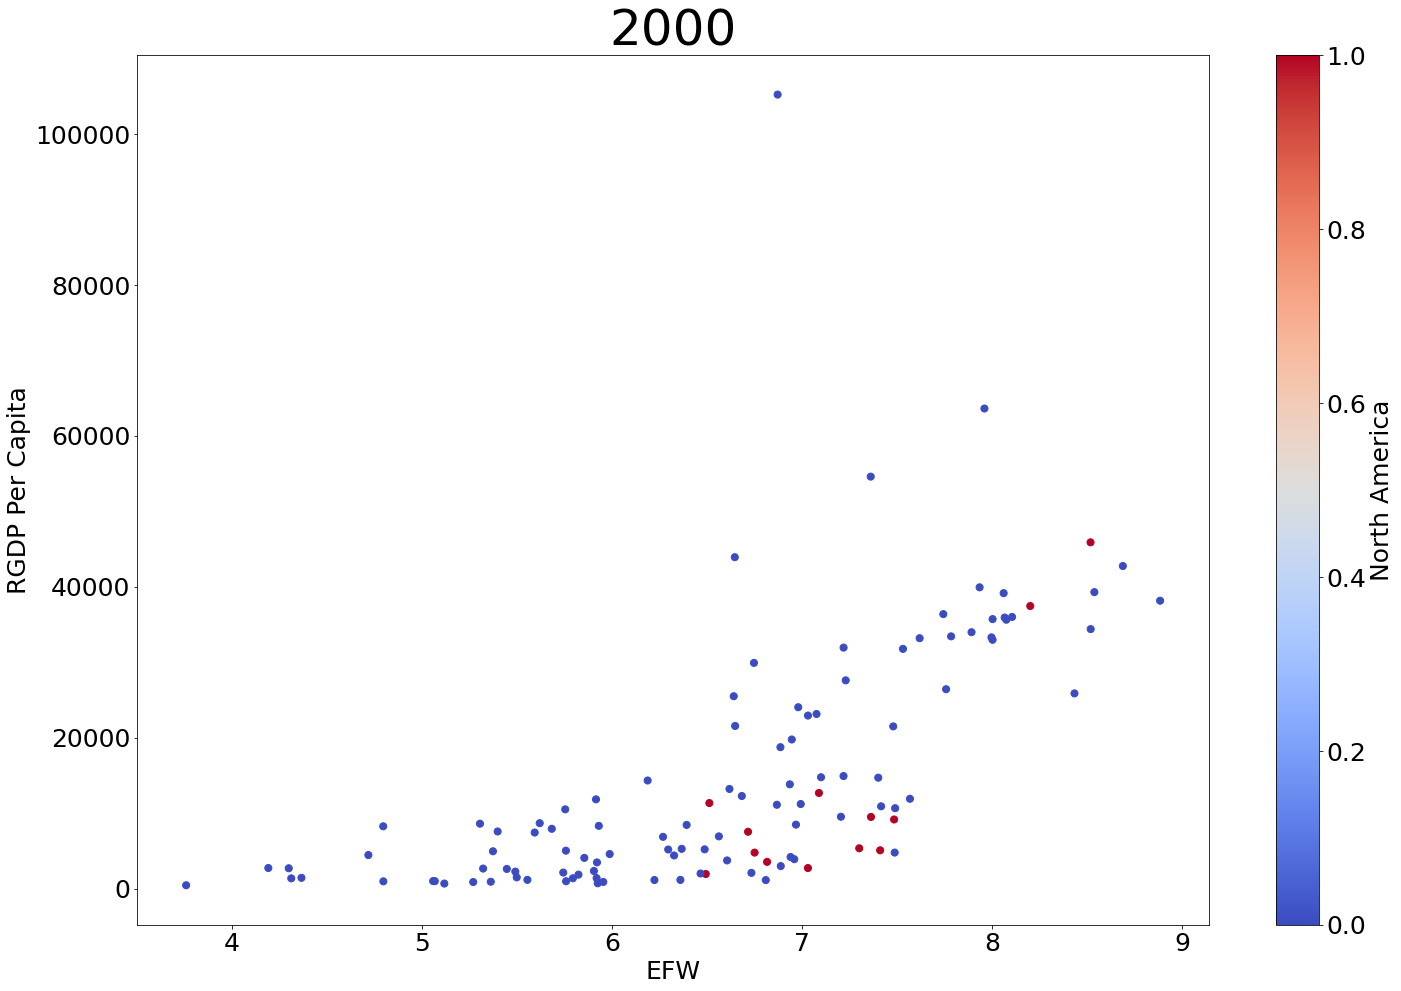

In [19]:
import datetime

year = 2000
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(x = "EFW", y = "RGDP Per Capita", c = "North America", cmap = "coolwarm", ax = ax, s = 50)
ax.set_title(str(year), fontsize = 50)

### Create Quantile Ranking

Similar to the pervious exercise, we may categorize data according ranked bins. This is accomplished by separating data into quantiles, often in the form of quartiles or quintiles, however this can be accomplished using any number of divisions. The following script allows you to create quantiles of the number of divisions of your choosing.

First, we need to import the data that we have merged. Once the dataframe is created, we must prepare a place for quantile data to be registered. Out of convenience, we will refer to the n-tile, meaning that a quartile will be labeled a “4-tile”, a quintile will be label a “5-tile”, and so forth. Before recording the data, we will create blank entries using np.nan.

In [21]:
#quantile.py  
import pandas as pd  
import numpy as np  

# choose numbers of divisions, n 
# Dividing the data into n parts. n = 4 will be quartile, n = 5 will be quantile
# n = 20 means dividing the data into 20 parts. etc. 
# Any Country in the first out of 20 parts will be the top 1/20 = top 5 %, etc. 

n = 20  

# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True) 

#create column identifying n-tile rank  
quantile_var = "RGDP Per Capita"  
quantile_name = quantile_var + " " + str(n) + "-tile"  
data[quantile_name] = np.nan

Now that the dataframe has been prepped, we can create function that will record quantile values. Since the data frame includes data for nearly every country over many years, we will want to choose one of the index categories to identify quantiles. We prefer to compare countries, 8so unique quantile measures will compare countries in a given year. We will build a list of years and use a for-loop to cycle through values in the list. For each year, we will construct a quantile values comparing countries within the year.

The create_quantile() function needs to be provided the number of divisions within a quantile (n), the dataframe (data), the year to which the quantile measure refers (year), the variable for which the quantile is constructed (quantile_var), and the key that will refer to the quantile data (quantile_name).

First, we construct the year_index. This provides a slice of the original index that includes only the years of interest. Next, we identify the value that divides each quantile. The pandas dataframe has a convenient command, df.quantile(percent), that will calculate the value for a particular percentile. For example, df.quantile(.25) will calculate the value representing the 25th percentile. A quantile is comprised of divisions whose size is a fraction of 1 and that sum to one. The value that divides each quantile is defined by i/n where n is the number of quartiles, and i includes all integers from 1 up to and including n.

Now that the values dividing each quantile for a given year have been identified, we can check which in which quantile each country falls. Cycle through the index for the year with for index in data[year_index].index. This allows us to calls up each individual countries data for the given year, compare that data of the category of interest to the quantile values, and select the identify quantile that the nation falls in for the year.

In [22]:
#quantile.py  
  
# Create quantile for each year    
def create_quantile(n, data, year, quantile_var, quantile_name):  
    # index that indentifies countries for a given year  
    year_index = data.index.get_level_values("Year") == year  
    
    # holds the deviding criteria from quantile n to quantile n+1
    quantile_values_dict = {i:data[year_index][quantile_var].quantile(i/n) for i in range(1, n + 1)}  
    
    # cycle through each country for a given year  
    # for index in --> for country in
    for index in data[year_index].index:  
        
        # identify value of the variable of interest  
        # take the value of the country for the variable that we are building the quantile for
        val = data.loc[index][quantile_var] 
        
        # compare that value to the values that divide each quantile  
        for i in range(1, n + 1):  
            
        # if the value is less than the highest in the quantile identified,  
        # save quantile as i  
            if val <= quantile_values_dict[i]:  
                data.loc[index,[quantile_name]] = int((n + 1) - i)  
                #exit loop  
                break  
                
            # otherwise check the higest value of the next quantile  
            else:  
                 continue  

# . . .

years = data.groupby("Year").mean().index
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

Again, it will be useful to use color to indicate discrete variables. In this case, color will represent the quantile. We will dividde the color bar into n divisions. For the sake of simplicity, we will place the number of quantile at the top of each color division.

Text(0.5, 1.0, 'Year: 2000')

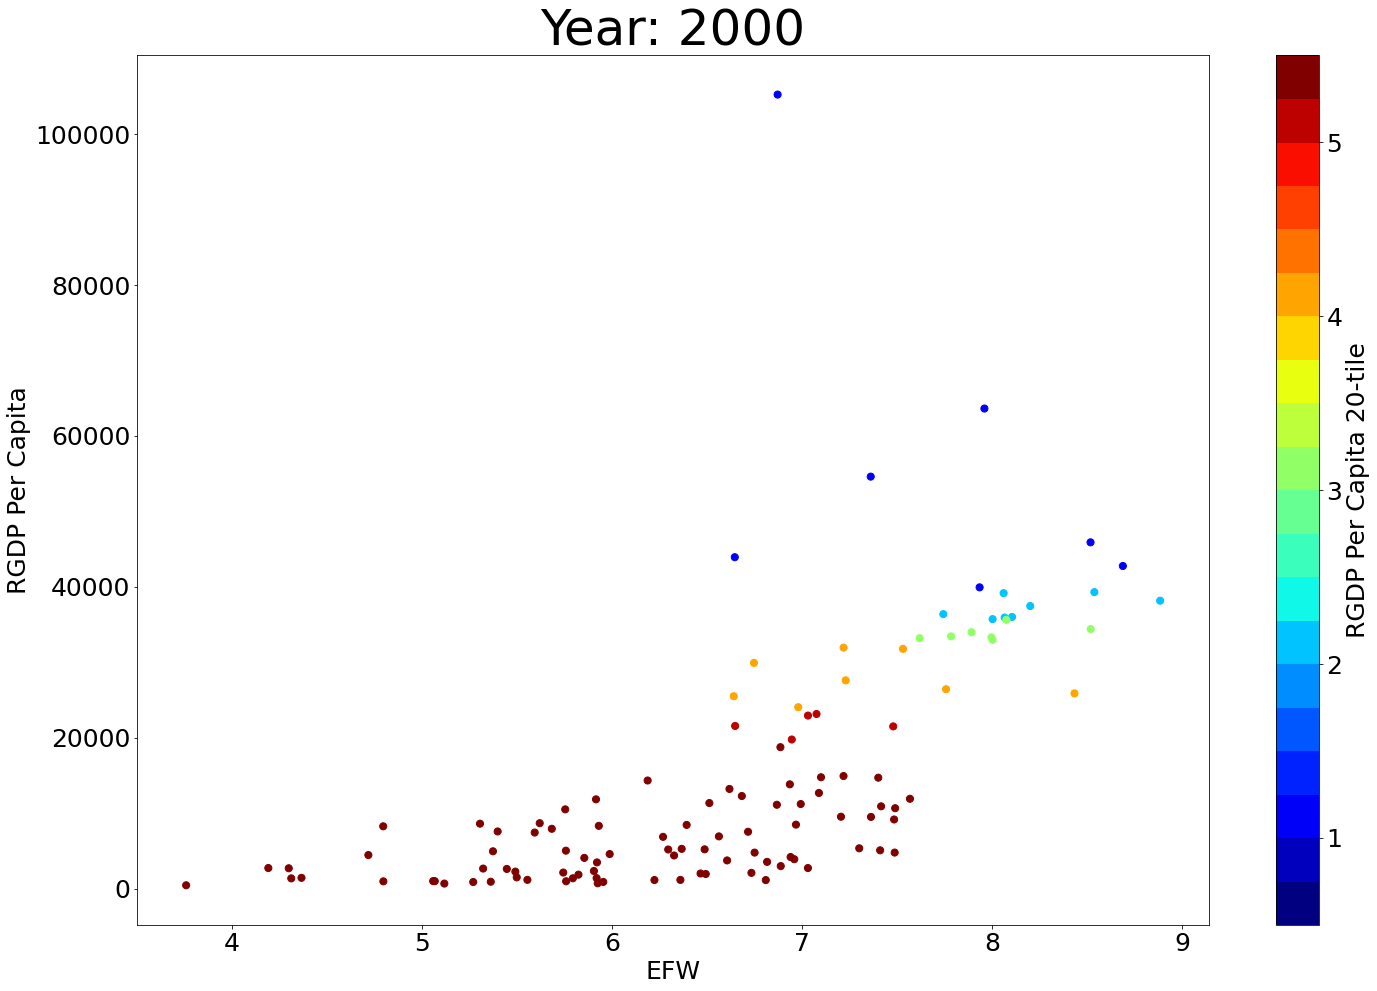

In [32]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2000
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
# change colors, divide into 4 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet', n)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# set vmin to 0.5 to slight shift scale, otherwise quintile 
# measures will be on border between colors and 1 and 2 will be 
# indicated in lightblue
plot_data.plot.scatter(x = "EFW", y = "RGDP Per Capita", 
                       c = "RGDP Per Capita " + str(n) + "-tile",
                       cmap = cmap, norm = norm,  ax = ax, s = 50,
                       legend = False, vmin = 0.5, vmax = 5.5)

# # to remove numbers between 0 and 1, access the color axis through plt.gcf()
# f = plt.gcf()
# cax  = f.get_axes()[1]
# # access colorbar values
# vals = cax.get_yticks()
# print(vals)
# # only include 0 or 1
# cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])
# # remove tick lines from color axis
# cax.tick_params(length = 0)

ax.set_title("Year: " + str(year), fontsize = 50)

In [23]:
# Now call "RGDP Per Capita" alongside the quantile rankings.
data[["RGDP Per Capita", "RGDP Per Capita 20-tile"]]

RGDP Per Capita  RGDP Per Capita 20-tile
ISO_Code Year                                                
ALB      2017-01-01              NaN                      NaN
         2016-01-01          11285.0                     11.0
         2015-01-01          10947.0                     11.0
         2014-01-01          10703.0                     12.0
         2013-01-01          10138.0                     12.0
         2012-01-01          10344.0                     12.0
         2011-01-01           9484.0                     12.0
         2010-01-01           9324.0                     11.0
         2009-01-01           9373.0                     11.0
         2008-01-01           8617.0                     11.0
         2007-01-01           7673.0                     11.0
         2006-01-01           7111.0                     11.0
         2005-01-01           6499.0                     11.0
         2004-01-01           6094.0                     11.0
         2003-01-01           5804.0                     11.0
         2002-01-01           5489.0                     11.0
         2001-01-01           5409.0                     11.0
         2000-01-01           5183.0                     11.0
         1995-01-01           4685.0                     12.0
         1990-01-01           4099.0                     13.0
         1985-01-01           3593.0                     13.0
         1980-01-01           3501.0                     13.0
         1975-01-01           3363.0                     12.0
         1970-01-01           2957.0                     12.0
DZA      2017-01-01              NaN                      NaN
         2016-01-01          13328.0                     10.0
         2015-01-01          13024.0                     10.0
         2014-01-01          12782.0                     10.0
         2013-01-01          12998.0                     10.0
         2012-01-01          13242.0                     10.0
...                              ...                      ...
ZMB      1995-01-01            981.0                     19.0
         1990-01-01           1369.0                     18.0
         1985-01-01           1770.0                     17.0
         1980-01-01           1462.0                     18.0
         1975-01-01           2059.0                     15.0
         1970-01-01           2031.0                     14.0
ZWE      2017-01-01              NaN                      NaN
         2016-01-01           1729.0                     18.0
         2015-01-01           1759.0                     18.0
         2014-01-01           1797.0                     18.0
         2013-01-01           1801.0                     18.0
         2012-01-01           1623.0                     18.0
         2011-01-01           1515.0                     18.0
         2010-01-01           1425.0                     19.0
         2009-01-01           1329.0                     19.0
         2008-01-01           1260.0                     19.0
         2007-01-01           1522.0                     18.0
         2006-01-01           1587.0                     18.0
         2005-01-01           1660.0                     18.0
         2004-01-01           1813.0                     17.0
         2003-01-01           1958.0                     16.0
         2002-01-01           2376.0                     15.0
         2001-01-01           2624.0                     15.0
         2000-01-01           2696.0                     15.0
         1995-01-01           2841.0                     14.0
         1990-01-01           3265.0                     14.0
         1985-01-01           3615.0                     13.0
         1980-01-01           4003.0                     12.0
         1975-01-01           4142.0                     11.0
         1970-01-01           3448.0                     11.0

[3888 rows x 2 columns]

### Lag Variables and Differenced Log Values
With time series data, it is often useful to control for trends when data is autocorrelated. Consider, for example, that real GDP data is often highly correlated with values from the previous period. We might detect a false causal relationship between two variables that are actually unrelated but follow a similar trend. For example, we might regress your age against real GDP and find that there is a strong correlation between the two. To avaoid false positives like this, it is useful to account for the influence of lagged values and/or to detrend the data all together by using differenced logs.

Creating lag variables is quite simple if the index is already recognized as containing dates and times. The method, df.shift(n) accomplishes this. Pass a negative value to create a lagged variable from n periods previous and a positive value to create a variable that refers to data n periods in the future.

Because we are using a double index, we must specify to which index we must instruct Pandas as to which index the shift refers. We accomplish this by using .groupby(level) to target the index column that does not refer to a datetime data. This will group the data by entity, thus leaving only the date column to be referenced by .shift(n). Since we only want a lag value from the period that immediately preceded the observation, n=-1.

In [24]:
#logAndDifferenceData.py   
import datetime  
  
# import data  
# data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"], parse_dates = True) 

# get complete data without using a filter
#data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")["RGDP Per Capita"].shift(-1)

# show lag for data from year >= 1999 and group by ISO_Code
data["RGDP Per Capita Lag"] = data[
    data.index.get_level_values("Year") >= datetime.datetime(1999,1,1)]\
    .groupby(level = "ISO_Code")["RGDP Per Capita"].shift(-1)

data

Countries       EFW  1  Size of Government  \
ISO_Code Year                                                    
ALB      2017-01-01   Albania  7.673511               7.528167   
         2016-01-01   Albania  7.637742               7.875862   
         2015-01-01   Albania  7.639666               7.904257   
         2014-01-01   Albania  7.586769               7.882037   
         2013-01-01   Albania  7.389525               7.807904   
         2012-01-01   Albania  7.332332               8.096375   
         2011-01-01   Albania  7.381064               7.820966   
         2010-01-01   Albania  7.380725               7.839664   
         2009-01-01   Albania  7.313856               7.785948   
         2008-01-01   Albania  7.276252               8.189874   
         2007-01-01   Albania  7.258078               8.633510   
         2006-01-01   Albania  7.148669               8.039787   
         2005-01-01   Albania  6.985649               8.031015   
         2004-01-01   Albania  6.858749               7.397515   
         2003-01-01   Albania  7.031750               7.832298   
         2002-01-01   Albania  6.516060               7.700479   
         2001-01-01   Albania  6.322281               7.272991   
         2000-01-01   Albania  6.296170               7.260723   
         1995-01-01   Albania  5.041307               6.222428   
         1990-01-01   Albania  4.347428               3.338928   
         1985-01-01   Albania       NaN                    NaN   
         1980-01-01   Albania       NaN                    NaN   
         1975-01-01   Albania       NaN                    NaN   
         1970-01-01   Albania       NaN                    NaN   
DZA      2017-01-01   Algeria  4.763472               3.577033   
         2016-01-01   Algeria  5.030748               3.716934   
         2015-01-01   Algeria  4.794132               3.200157   
         2014-01-01   Algeria  5.136326               3.983687   
         2013-01-01   Algeria  5.167820               4.035976   
         2012-01-01   Algeria  5.003921               3.453623   
...                       ...       ...                    ...   
ZMB      1995-01-01    Zambia  4.418360               5.895636   
         1990-01-01    Zambia  2.870869               3.638100   
         1985-01-01    Zambia  3.286548               2.885189   
         1980-01-01    Zambia  4.269533               2.345607   
         1975-01-01    Zambia  3.709106               2.288363   
         1970-01-01    Zambia       NaN                    NaN   
ZWE      2017-01-01  Zimbabwe  5.699539               5.491676   
         2016-01-01  Zimbabwe  6.033204               5.926764   
         2015-01-01  Zimbabwe  6.145330               6.402772   
         2014-01-01  Zimbabwe  5.582478               6.433165   
         2013-01-01  Zimbabwe  5.246723               6.325105   
         2012-01-01  Zimbabwe  4.971192               6.670469   
         2011-01-01  Zimbabwe  4.843441               6.424630   
         2010-01-01  Zimbabwe  4.374917               6.514112   
         2009-01-01  Zimbabwe  4.314332               7.369615   
         2008-01-01  Zimbabwe  4.491870               7.070748   
         2007-01-01  Zimbabwe  3.204629               5.970748   
         2006-01-01  Zimbabwe  3.012548               4.770748   
         2005-01-01  Zimbabwe  2.889240               4.291101   
         2004-01-01  Zimbabwe  3.181057               5.184469   
         2003-01-01  Zimbabwe  3.675260               5.709175   
         2002-01-01  Zimbabwe  3.625483               5.514469   
         2001-01-01  Zimbabwe  3.633489               5.547411   
         2000-01-01  Zimbabwe  4.299839               5.365058   
         1995-01-01  Zimbabwe  5.518614               6.418859   
         1990-01-01  Zimbabwe  4.516140               5.108843   
         1985-01-01  Zimbabwe  4.226841               5.026250   
         1980-01-01  Zimbabwe  4.054740               6.3226

The earliest dates included nowonly reach as far back as the year 2001.

Now that we’ve delimited the data, let’s perform some other transformation that will help to prepare the data for a regression. It will be useful to log GDP values as the rate of growth of GDP measured in raw units tends to increase over time. By logging data, beta estimates will approximate the cross elasticity of the endogenous variable y with respect to a change in an exogenous variable x.

Since we have already created a lagged measure of real GDP, this is a good opportunitiy to use a for loop. We only want to log values referred to be a key that includes the string “GDP”. We check each key for inclusion of this term. If the term is included in the key, than we add a logged version of the variable.

In [25]:
#logAndDifferenceData.py

# next, log the data
for key in data:
    if "GDP" in key:
        data["Log " + key] = np.log(data[key])

data

Countries       EFW  1  Size of Government  \
ISO_Code Year                                                    
ALB      2017-01-01   Albania  7.673511               7.528167   
         2016-01-01   Albania  7.637742               7.875862   
         2015-01-01   Albania  7.639666               7.904257   
         2014-01-01   Albania  7.586769               7.882037   
         2013-01-01   Albania  7.389525               7.807904   
         2012-01-01   Albania  7.332332               8.096375   
         2011-01-01   Albania  7.381064               7.820966   
         2010-01-01   Albania  7.380725               7.839664   
         2009-01-01   Albania  7.313856               7.785948   
         2008-01-01   Albania  7.276252               8.189874   
         2007-01-01   Albania  7.258078               8.633510   
         2006-01-01   Albania  7.148669               8.039787   
         2005-01-01   Albania  6.985649               8.031015   
         2004-01-01   Albania  6.858749               7.397515   
         2003-01-01   Albania  7.031750               7.832298   
         2002-01-01   Albania  6.516060               7.700479   
         2001-01-01   Albania  6.322281               7.272991   
         2000-01-01   Albania  6.296170               7.260723   
         1995-01-01   Albania  5.041307               6.222428   
         1990-01-01   Albania  4.347428               3.338928   
         1985-01-01   Albania       NaN                    NaN   
         1980-01-01   Albania       NaN                    NaN   
         1975-01-01   Albania       NaN                    NaN   
         1970-01-01   Albania       NaN                    NaN   
DZA      2017-01-01   Algeria  4.763472               3.577033   
         2016-01-01   Algeria  5.030748               3.716934   
         2015-01-01   Algeria  4.794132               3.200157   
         2014-01-01   Algeria  5.136326               3.983687   
         2013-01-01   Algeria  5.167820               4.035976   
         2012-01-01   Algeria  5.003921               3.453623   
...                       ...       ...                    ...   
ZMB      1995-01-01    Zambia  4.418360               5.895636   
         1990-01-01    Zambia  2.870869               3.638100   
         1985-01-01    Zambia  3.286548               2.885189   
         1980-01-01    Zambia  4.269533               2.345607   
         1975-01-01    Zambia  3.709106               2.288363   
         1970-01-01    Zambia       NaN                    NaN   
ZWE      2017-01-01  Zimbabwe  5.699539               5.491676   
         2016-01-01  Zimbabwe  6.033204               5.926764   
         2015-01-01  Zimbabwe  6.145330               6.402772   
         2014-01-01  Zimbabwe  5.582478               6.433165   
         2013-01-01  Zimbabwe  5.246723               6.325105   
         2012-01-01  Zimbabwe  4.971192               6.670469   
         2011-01-01  Zimbabwe  4.843441               6.424630   
         2010-01-01  Zimbabwe  4.374917               6.514112   
         2009-01-01  Zimbabwe  4.314332               7.369615   
         2008-01-01  Zimbabwe  4.491870               7.070748   
         2007-01-01  Zimbabwe  3.204629               5.970748   
         2006-01-01  Zimbabwe  3.012548               4.770748   
         2005-01-01  Zimbabwe  2.889240               4.291101   
         2004-01-01  Zimbabwe  3.181057               5.184469   
         2003-01-01  Zimbabwe  3.675260               5.709175   
         2002-01-01  Zimbabwe  3.625483               5.514469   
         2001-01-01  Zimbabwe  3.633489               5.547411   
         2000-01-01  Zimbabwe  4.299839               5.365058   
         1995-01-01  Zimbabwe  5.518614               6.418859   
         1990-01-01  Zimbabwe  4.516140               5.108843   
         1985-01-01  Zimbabwe  4.226841               5.026250   
         1980-01-01  Zimbabwe  4.054740               6.3226


The data is almost prepared. We have only left to create data that has been diferenced. Differenced log values approximate the rate of change of a variable. Likewise, we can difference the index values to test for the effect of an improvement in a nation’s economic freedom score on the rate of GDP growth.

To difference data with a multi index, we must first organize the data so that observations are presented sequentially by entity. This uses the same command, .groupby(), that we used earlier to create a lag value. The result this time is that a new dataframe is created by taking the differenced values of all variables in the dataframe.

We save the new results in a dictionary that holds both the original dataframe and the new dataframe with differenced data.

In [26]:
#logAndDifferenceData.py

# We do not want to difference the index values, only the Real GDP values  
# so initialize the diff data as teh dataframe but only include index values  
# from a differenced matrix (one year of observations will be missing)  
diff_index = data.groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
for key in data:  
    if "GDP" in key:  
        data_dict["Diff Data"][key] = data[key].groupby(level=0).diff(-1)  
        
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()

In [27]:
# Now let's check the data that we saved as data_dict["Diff Data"]
data_dict["Diff Data"]

Countries       EFW  1  Size of Government  \
ISO_Code Year                                                    
ALB      2016-01-01   Albania  7.637742               7.875862   
         2015-01-01   Albania  7.639666               7.904257   
         2014-01-01   Albania  7.586769               7.882037   
         2013-01-01   Albania  7.389525               7.807904   
         2012-01-01   Albania  7.332332               8.096375   
         2011-01-01   Albania  7.381064               7.820966   
         2010-01-01   Albania  7.380725               7.839664   
         2009-01-01   Albania  7.313856               7.785948   
         2008-01-01   Albania  7.276252               8.189874   
         2007-01-01   Albania  7.258078               8.633510   
         2006-01-01   Albania  7.148669               8.039787   
         2005-01-01   Albania  6.985649               8.031015   
         2004-01-01   Albania  6.858749               7.397515   
         2003-01-01   Albania  7.031750               7.832298   
         2002-01-01   Albania  6.516060               7.700479   
DZA      2016-01-01   Algeria  5.030748               3.716934   
         2015-01-01   Algeria  4.794132               3.200157   
         2014-01-01   Algeria  5.136326               3.983687   
         2013-01-01   Algeria  5.167820               4.035976   
         2012-01-01   Algeria  5.003921               3.453623   
         2011-01-01   Algeria  4.996977               3.385275   
         2010-01-01   Algeria  5.160535               3.834759   
         2009-01-01   Algeria  5.286659               3.525687   
         2008-01-01   Algeria  5.279900               3.491659   
         2007-01-01   Algeria  5.439377               3.823207   
         2006-01-01   Algeria  5.611940               3.909694   
         2005-01-01   Algeria  5.508883               4.281689   
         2004-01-01   Algeria  5.004534               3.924179   
         2003-01-01   Algeria  4.838308               3.420312   
         2002-01-01   Algeria  4.805580               3.698310   
...                       ...       ...                    ...   
ZMB      2016-01-01    Zambia  6.656872               6.190111   
         2015-01-01    Zambia  6.787776               6.263052   
         2014-01-01    Zambia  7.037295               6.310111   
         2013-01-01    Zambia  6.982161               6.478347   
         2012-01-01    Zambia  7.075396               6.660963   
         2011-01-01    Zambia  7.195288               7.326397   
         2010-01-01    Zambia  7.200159               7.554701   
         2009-01-01    Zambia  7.082776               7.033993   
         2008-01-01    Zambia  7.006719               7.167740   
         2007-01-01    Zambia  6.992605               7.021825   
         2006-01-01    Zambia  6.929890               6.829328   
         2005-01-01    Zambia  6.554754               6.226837   
         2004-01-01    Zambia  6.554607               6.269709   
         2003-01-01    Zambia  6.508038               6.081559   
         2002-01-01    Zambia  6.266813               5.787088   
ZWE      2016-01-01  Zimbabwe  6.033204               5.926764   
         2015-01-01  Zimbabwe  6.145330               6.402772   
         2014-01-01  Zimbabwe  5.582478               6.433165   
         2013-01-01  Zimbabwe  5.246723               6.325105   
         2012-01-01  Zimbabwe  4.971192               6.670469   
         2011-01-01  Zimbabwe  4.843441               6.424630   
         2010-01-01  Zimbabwe  4.374917               6.514112   
         2009-01-01  Zimbabwe  4.314332               7.369615   
         2008-01-01  Zimbabwe  4.491870               7.070748   
         2007-01-01  Zimbabwe  3.204629               5.970748   
         2006-01-01  Zimbabwe  3.012548               4.770748   
         2005-01-01  Zimbabwe  2.889240               4.291101   
         2004-01-01  Zimbabwe  3.181057               5.1844

Notice that there exist no data for the first year of observations. Without a previous year to draw from for the year 1999, the pandas dataframe is left blank for differenced values in this year.